# Open methods

Another class of root finding algorithms do not require bracketting, and are therefore deemed *open*. This alleviates the issue of N-D dimensionalization at the expense of robustness. They are usually faster than bracketting methods since we are not constantly updating the brackets, but our method is now succeptible to divergence.  

## Secant method

Let's reconsider the method of False Position but now we always disregard bracket updating and simply take $c$ as our new guess. Our algorithm is now:

> Take 2 initial guesses: $x^i$
>
> Calculate the next guess:

$$x^{i+1} = {x^i} - f(x^{i}) \frac{x^i-x^{i-1}}{f(x^i)-f(x^{i-1})} $$

> Check if tolerance is met

(Which tolerance?)

Iteration 0: x = 2
Iteration 1: x = 1.3333333333333335
Iteration 2: x = 1.4000000000000001
Iteration 3: x = 1.4146341463414633
Iteration 4: x = 1.41421143847487
Iteration 5: x = 1.4142135620573204
Approximate root: 1.4142135620573204

The sequence of errors is:
Iteration,  0  error in x is  0.4142135620573204
Iteration,  1  error in x is  0.5857864379426796
Iteration,  2  error in x is  0.08088022872398692
Iteration,  3  error in x is  0.014213562057320273
Iteration,  4  error in x is  0.00042058428414293303
Iteration,  5  error in x is  2.12358245033073e-06
Iteration,  6  error in x is  0.0


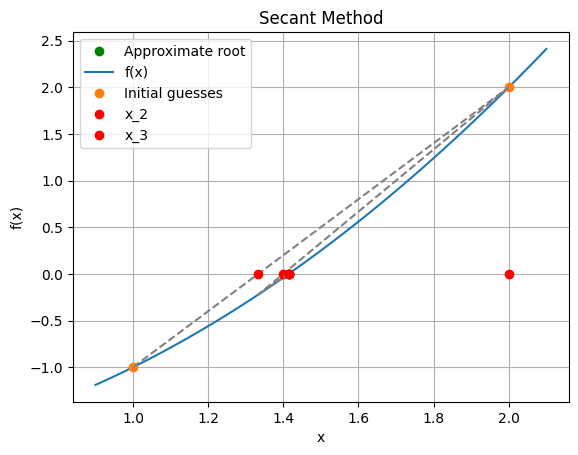

In [ ]:
# prompt: Solve x^2-2 using the secant method, plotting each step with lines and each guess with points on the x-axis

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 - 2

def secant_method(f, x0, x1, tolerance=1e-6, max_iterations=100):
  """
  Finds the root of a function using the secant method.

  Args:
    f: The function to find the root of.
    x0: The initial guess.
    x1: The second initial guess.
    tolerance: The desired tolerance for the root.
    max_iterations: The maximum number of iterations.

  Returns:
    The approximate root of the function.
  """
  print(f"Iteration 0: x = {x1}")
  x_values = [x0, x1]
  for i in range(max_iterations):
    x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
    x_values.append(x_new)
    print(f"Iteration {i+1}: x = {x_new}")
    if abs(f(x_new)) < tolerance:
      return x_new, x_values
    x0 = x1
    x1 = x_new
  return None, x_values

# Initial guesses
x0 = 1
x1 = 2

# Find the root using the secant method
root, x_values = secant_method(f, x0, x1)


if root:
    print("Approximate root:", root)
    plt.plot(root, 0, 'go', label='Approximate root')
else:
    print("Secant method did not converge within the maximum number of iterations.")

error = abs(np.array(x_values)-root)
print("\nThe sequence of errors is:")
for i,e in enumerate(error):
  print('Iteration, ', i, ' error in x is ', e)


# Plot the function and the secant method iterations
x = np.linspace(.9, 2.1, 100)
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method')
plt.grid(True)

# Plot the initial guesses
plt.plot([x0, x1], [f(x0), f(x1)], 'o', label='Initial guesses')

# Plot each iteration of the secant method
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i+1]], [f(x_values[i]), f(x_values[i+1])], '--', color='gray')
    plt.plot(x_values[i+1], 0, 'ro', label=f'x_{i+2}' if i < 2 else None)


plt.legend()
plt.show()


The Secant method maintains superlinear convergence
...
but we can do better with a little more information...

## The Newton-Raphson method

Take another look at the fraction in the Secant method update equation:

$$x^{i+1} = {x^i} - f(x^{i}) \frac{x^i-x^{i-1}}{f(x^i)-f(x^{i-1})} $$

This is an (inverse) approximation of $\frac{\partial f}{\partial x}$, the derivative of $f$! Typically, we are able to find this quantity, and the algorithm becomes:



$$ x^{i+1} = {x^i} - \frac{f(x^{i})}{f'(x^i)} $$

or, solving for the increment $\Delta x = x^{i+1}-x^i$ and dropping the indicies,

$$ \begin{align}
\Delta x &= - \frac{f(x)}{f'(x)} \\
f'(x) \Delta x &= - f(x)
\end{align} $$

Iteration 0: x = 1
Iteration 1: x = 1.5
Iteration 2: x = 1.4166666666666667
Iteration 3: x = 1.4142156862745099
Iteration 4: x = 1.4142135623746899
Approximate root: 1.4142135623746899

The sequence of errors is:
Iteration,  0  error in x is  0.41421356237468987
Iteration,  1  error in x is  0.08578643762531013
Iteration,  2  error in x is  0.002453104291976871
Iteration,  3  error in x is  2.123899820016817e-06
Iteration,  4  error in x is  0.0


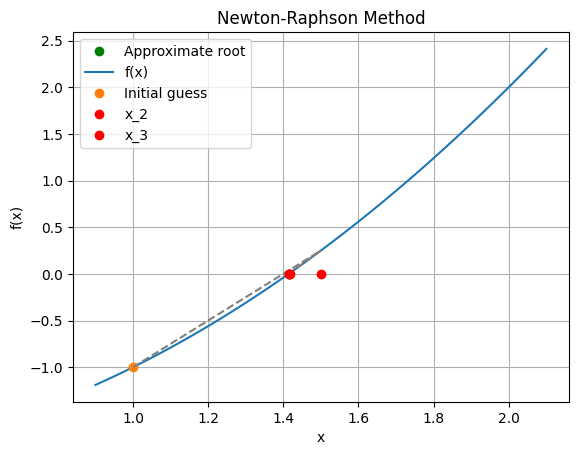

In [ ]:
# prompt: Repeat the root finding using Newton's method and scipy tools

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 - 2

def df(x):
  return 2*x

def newton_raphson(f, df, x0, tolerance=1e-6, max_iterations=100):
  """
  Finds the root of a function using the Newton-Raphson method.

  Args:
    f: The function to find the root of.
    df: The derivative of the function.
    x0: The initial guess.
    tolerance: The desired tolerance for the root.
    max_iterations: The maximum number of iterations.

  Returns:
    The approximate root of the function.
  """

  x_values = [x0]
  print(f"Iteration 0: x = {x0}")
  for i in range(max_iterations):
    x_new = x0 - f(x0) / df(x0)
    x_values.append(x_new)
    print(f"Iteration {i+1}: x = {x_new}")
    if abs(f(x_new)) < tolerance:
      return x_new, x_values
    x0 = x_new
  return None, x_values

# Initial guess
x0 = 1

# Find the root using the Newton-Raphson method
root, x_values = newton_raphson(f, df, x0)

if root:
    print("Approximate root:", root)
    plt.plot(root, 0, 'go', label='Approximate root')
else:
    print("Newton-Raphson method did not converge within the maximum number of iterations.")

error = abs(np.array(x_values)-root)
print("\nThe sequence of errors is:")
for i,e in enumerate(error):
  print('Iteration, ', i, ' error in x is ', e)


# Plot the function and the Newton-Raphson method iterations
x = np.linspace(.9, 2.1, 100)
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method')
plt.grid(True)

# Plot the initial guess
plt.plot([x0], [f(x0)], 'o', label='Initial guess')

# Plot each iteration of the Newton-Raphson method
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i+1]], [f(x_values[i]), f(x_values[i+1])], '--', color='gray')
    plt.plot(x_values[i+1], 0, 'ro', label=f'x_{i+2}' if i < 2 else None)


plt.legend()
plt.show()

The Newton-Raphson method has quadratic convergence ($k=2$) *near the root* which is a great result! It does so, however at the cost of calculating the Jacobian and solving a linear system.

As we saw in the previous lecture, Newton's method amounts to usign the current position and the (true) tangent to estimate the next guess:

$$ f'(x) \Delta x = - f(x)$$

Graphically:

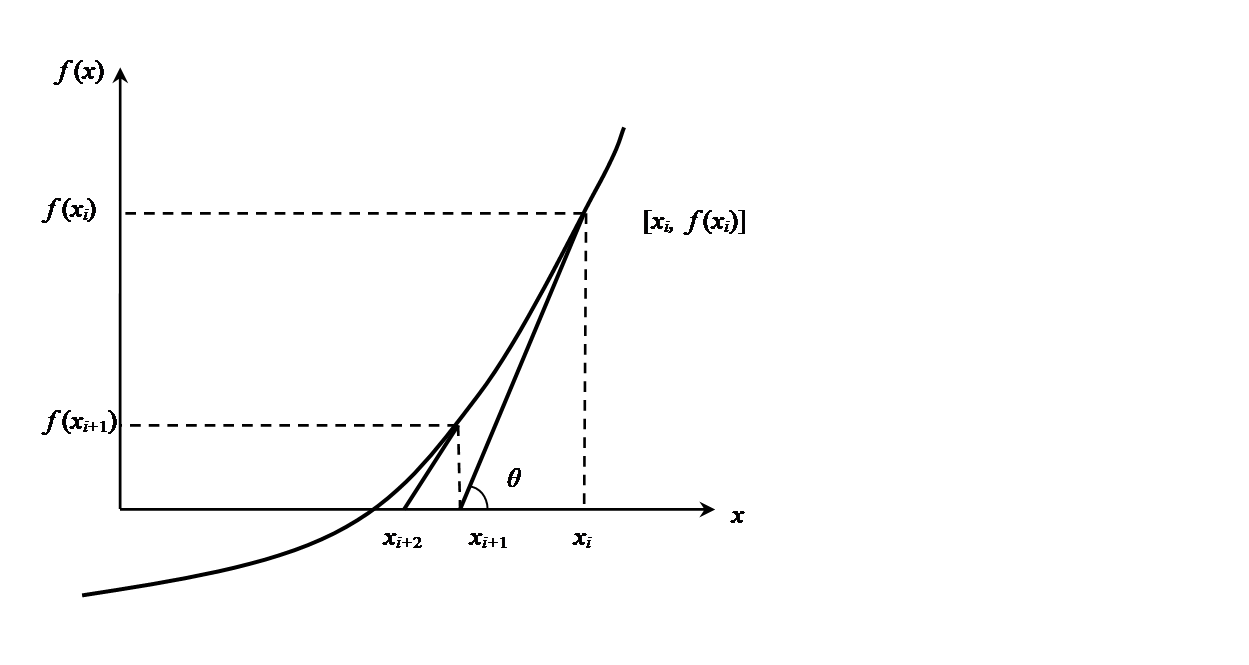

Near the root, it converges quadratically, but there are some not-uncommon scenarios where it can fail:

The Newton-Raphson method only finds *local* roots, not all of them. Efficient and robust root finding **requires a good initial guess**.

Fortunatley, in Engineering, this is commonly the case!


#### Example of an initial guess


If we need to solve for temperature $T(x,y,z,t)$ as a nonlinear, time dependent, partial differential equation, we will be given an initial value for $T(x,y,z, t=0)$.

When solving a nonlinear equation for $T(x,y,z,t=1)$, what do you suppose the initial guess should be?

Answer: The initial guess for should be the solution at the preceeding time step!

#### Example: find the root of $x^3-2x+2$

There is a real root at x~-1.769.

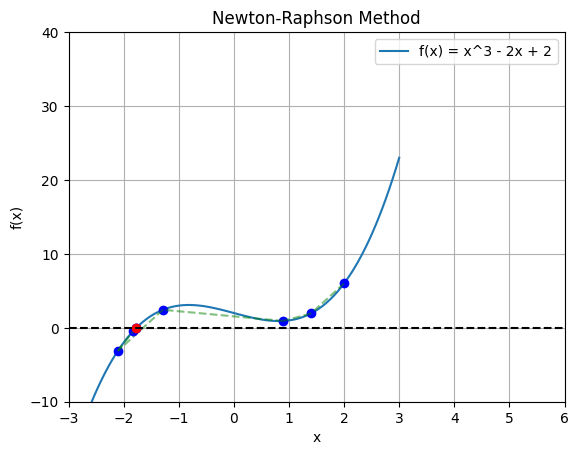

Newton-Raphson method failed to converge.


In [ ]:
# prompt: Use a newton-raphson method to find the root of x^3-2x+2 form an initial guess of 5 and max iterations 10, plotting the function and showing the guesses labelled

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function whose root we want to find."""
  return x**3 - 2*x + 2

def df(x):
  """The derivative of the function."""
  return 3*x**2 - 2

def newton_raphson(f, df, x0, max_iter=8, tolerance=1e-6):
  """
  Finds a root of the function f using the Newton-Raphson method.

  Args:
    f: The function whose root we want to find.
    df: The derivative of the function.
    x0: The initial guess for the root.
    max_iter: The maximum number of iterations.
    tolerance: The tolerance for the root.

  Returns:
    The root of the function, or None if the method fails to converge.
  """
  x = x0
  guesses = [x]
  for i in range(max_iter):
    x_new = x - f(x) / df(x)
    guesses.append(x_new)

    if abs(x_new - x) < tolerance:
      return x_new, guesses

    x = x_new
  return None, guesses

x0 = 2
root, guesses = newton_raphson(f, df, x0)


# Plot the function and the guesses
x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = x^3 - 2x + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson Method")

for i, guess in enumerate(guesses):
  plt.plot(guess, f(guess), 'ro' if i == len(guesses) - 1 else 'bo')
  if i > 0:
    plt.plot([guesses[i-1], guess], [f(guesses[i-1]), f(guess)], 'g--', alpha=0.5)


plt.axhline(0, color='black', linestyle='--')  # Add horizontal line at y=0
plt.legend()
plt.xlim([-3, 6]) # Set x-axis limits
plt.ylim([-10, 40]) # Set y-axis limits
plt.grid(True)
plt.show()

if root:
  print(f"Root found: {root:.6f}")
else:
  print("Newton-Raphson method failed to converge.")


#### Example: Find the root of $\sqrt(x)$

In [ ]:
import numpy as np
def f(x):
  return np.sqrt(x)

def jacobian(x):
  return 1/3*x**(-2./3)

def newton_raphson(x0, tolerance=1e-6, max_iterations=10):
  """
  Newton-Raphson method for solving a system of nonlinear equations.
  """
  x = x0
  for iter in range(max_iterations):
    f_x = f(x)
    print("Iteration, ", iter, " the guess is ", np.round(x,3), " with residual ", np.linalg.norm(f_x) )
    J_x = jacobian(x)
    delta_x = -f_x/J_x
    x = x + delta_x
    if np.linalg.norm(f_x) < tolerance:
      return x
  return None  # No solution found within the maximum iterations

newton_raphson(x0 = 2)
#newton_raphson(x0 = 2+0j)

Iteration,  0  the guess is  2  with residual  1.4142135623730951
Iteration,  1  the guess is  -4.735  with residual  nan
Iteration,  2  the guess is  nan  with residual  nan
Iteration,  3  the guess is  nan  with residual  nan
Iteration,  4  the guess is  nan  with residual  nan
Iteration,  5  the guess is  nan  with residual  nan
Iteration,  6  the guess is  nan  with residual  nan
Iteration,  7  the guess is  nan  with residual  nan
Iteration,  8  the guess is  nan  with residual  nan
Iteration,  9  the guess is  nan  with residual  nan


<ipython-input-17-26a7d35b8674>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
<ipython-input-17-26a7d35b8674>:6: RuntimeWarning: invalid value encountered in scalar power
  return 1/3*x**(-2./3)


What went wrong here? What else could we try?

### Some common failure situations

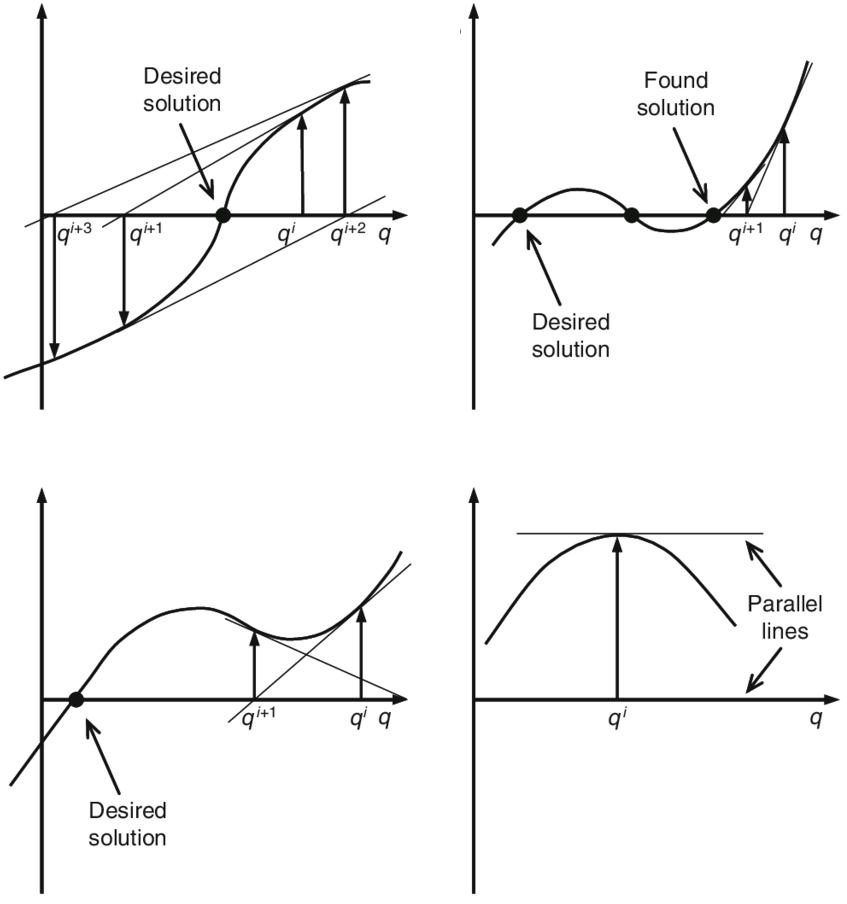

Before we talk about mitigation strategies, let's generalize the Newton-Raphson method to N-D

# The N-D Newton-Raphson method

The Newton-Raphson method thus far has been described for scalar functions or scalar arguments (i.e.: 1-D).


Consider a system of $n$ unkowns $\vec{x}$ and a set of $n$ nonlinear equations that we wish to solve simultaneously:

$$\begin{align}
f_1(\vec{x}) &= 0 \\
f_2(\vec{x}) &= 0 \\
\vdots \\
f_n(\vec{x}) &= 0
\end{align} $$

which may be summarized as a vector function $\vec{f}(\vec{x})=\vec{0}$ also of dimension $n$. Since we have $n$ equations and $n$ unkowns, we can (hopefully) find an exact solution of the simultaneous set of equations, i.e.: a root.

The Newton-Raphson method generalized quite readily except the derivative must be replaced by the vector-derivative of a vector function (called the *Jacobian*):

$$
J = \frac{\partial \vec{f}}{\partial \vec{x}} =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \dots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \dots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \dots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

where we can see that $J$ is a square $n \times n$ matrix. The Newton-Raphson method takes the form:
$$
J \Delta \vec{x} = - \vec{f}
$$
which is .... (wait for it!)... a linear system solving for the vector of increments, $\Delta\vec{x}$!

This is an example of computational-thinking: we have broken down a muiltivariable non-linear vector function into a sequence of linear systems!

#### Example: solve a system of nonlinear equations:

$$ \begin{align}
x^2 + y^2 - z &= 1 \\
x - y^2 + z^2 &= 1 \\
x y z &= 1
\end{align} $$

#####Answer

Rewrite the equations as a system of nonlinear functions:

$$\begin{align}
f_1(x, y, z) &= x^2 + y^2 - z - 1 \\
f_2(x, y, z) &= x - y^2 + z^2 -1  \\
f_3(x, y, z) &= x*y*z - 1
\end{align} $$

or in vector form:

$$\vec{f}(\vec{x}) = \begin{bmatrix}
f_1(x, y, z) \\
f_2(x, y, z) \\
f_3(x, y, z)
\end{bmatrix} =
\begin{bmatrix}
x^2 + y^2 - z - 1 \\
x - y^2 + z^2 -1 \\
x y z - 1
\end{bmatrix}
=\vec{0}
$$


The Jacobian is:

$$
J = \frac{\partial \vec{f}}{\partial \vec{x}} =
\begin{bmatrix}
2x & 2y & -1 \\
1 & -2y & 2z \\
yz & xz & xy
\end{bmatrix}
$$

Now for a given $\vec{x}$ we can solve for the increment.

In [ ]:
# prompt: show newton's method to solve this system, using linalg.solve

import numpy as np

def f(x):
  """
  The system of nonlinear equations.
  """
  x, y, z = x
  return np.array([
      x**2 + y**2 - z - 1,
      x - y**2 + z**2 - 1,
      x * y * z - 1
  ])

def jacobian(x):
  """
  The Jacobian matrix.
  """
  x, y, z = x
  return np.array([
      [2 * x, 2 * y, -1],
      [1, -2 * y, 2 * z],
      [y * z, x * z, x * y]
  ])

def newton_raphson(x0, tolerance=1e-6, max_iterations=100):
  """
  Newton-Raphson method for solving a system of nonlinear equations.
  """
  x = x0
  for iter in range(max_iterations):
    f_x = f(x)
    print("Iteration, ", iter, " the guess is ", np.round(x,3), " with residual ", np.linalg.norm(f_x) )
    J_x = jacobian(x)

    #~~~~ What now? ####


    #~~ Answer
    #delta_x = np.linalg.solve(J_x, -f_x)
    #~~~~
    x = x + delta_x
    if np.linalg.norm(f_x) < tolerance:
      return x
  return None  # No solution found within the maximum iterations

# Initial guess
x0 = np.array([2, 2, 2])

# Solve the system
solution = newton_raphson(x0)

if solution is not None:
  print("Solution found:", solution)
else:
  print("No solution found within the maximum iterations.")


Iteration,  0  the guess is  [2 2 2]  with residual  8.660254037844387
Iteration,  1  the guess is  [1.04 1.61 1.6 ]  with residual  1.9930051233250754
Iteration,  2  the guess is  [1.07  1.091 1.066]  with residual  0.36503151275567536
Iteration,  3  the guess is  [1.001 1.008 1.007]  with residual  0.019821923184321227
Iteration,  4  the guess is  [1. 1. 1.]  with residual  9.992137180440437e-05
Iteration,  5  the guess is  [1. 1. 1.]  with residual  2.103116571058853e-09
Solution found: [1. 1. 1.]


Let's try a different initial guess:

In [ ]:
solution = newton_raphson(np.array([3, 3 , 3]))

Iteration,  0  the guess is  [3 3 3]  with residual  29.597297173897484
Iteration,  1  the guess is  [1.054 2.533 2.524]  with residual  6.998575456719698
Iteration,  2  the guess is  [0.889 1.641 1.66 ]  with residual  1.6424438231583698
Iteration,  3  the guess is  [ 2.047  0.239 -0.06 ]  with residual  3.603276469109183
Iteration,  4  the guess is  [1.707 1.028 2.231]  with residual  5.517969890171211
Iteration,  5  the guess is  [1.238 0.984 1.279]  with residual  1.0856646419132276
Iteration,  6  the guess is  [1.031 0.998 1.016]  with residual  0.0930478495194166
Iteration,  7  the guess is  [1. 1. 1.]  with residual  0.0010714827370243664
Iteration,  8  the guess is  [1. 1. 1.]  with residual  1.8136147365183113e-07


Great, but something is funny with the residual... Let's keep going!

In [ ]:
solution = newton_raphson(np.array([10, 10 , 10]))

Iteration,  0  the guess is  [10 10 10]  with residual  1016.7610338717747
Iteration,  1  the guess is  [1.037 9.488 9.486]  with residual  122.54179913742261
Iteration,  2  the guess is  [0.99  5.009 5.009]  with residual  31.151332424357115
Iteration,  3  the guess is  [0.91  2.803 2.812]  with residual  7.863318171708681
Iteration,  4  the guess is  [0.756 1.814 1.861]  with residual  1.8475446018143282
Iteration,  5  the guess is  [0.273 1.768 1.965]  with residual  0.24020703623206316
Iteration,  6  the guess is  [0.319 1.664 1.858]  with residual  0.01924168764896064
Iteration,  7  the guess is  [0.327 1.656 1.848]  with residual  0.00026048720664438785
Iteration,  8  the guess is  [0.327 1.656 1.848]  with residual  4.90450098732614e-08


Still converged but to a different root...

What about negatives?

In [ ]:
solution = newton_raphson(np.array([-1, -1 ,-1]))

Iteration,  0  the guess is  [-1 -1 -1]  with residual  3.4641016151377544
Iteration,  1  the guess is  [-7.  5.  1.]  with residual  86.62563131083085
Iteration,  2  the guess is  [-3.924  2.106  0.99 ]  with residual  21.7413789453847
Iteration,  3  the guess is  [-2.54   0.452  1.005]  with residual  5.807927456281761
Iteration,  4  the guess is  [-1.921 -0.552  1.606]  with residual  1.686308408306664
Iteration,  5  the guess is  [-1.619 -0.393  1.659]  with residual  0.13083381603982347
Iteration,  6  the guess is  [-1.583 -0.383  1.652]  with residual  0.0015836394832936728
Iteration,  7  the guess is  [-1.583 -0.382  1.652]  with residual  2.8665073240160246e-07


Another root?

In [ ]:
solution = newton_raphson(np.array([-10, 0,-10]))

Iteration,  0  the guess is  [-10   0 -10]  with residual  140.72313242676202
Iteration,  1  the guess is  [-4.786  0.01  -5.289]  with residual  35.1045008430222
Iteration,  2  the guess is  [-2.189  0.049 -2.946]  with residual  8.720052763994339
Iteration,  3  the guess is  [-0.908  0.203 -1.8  ]  with residual  2.2103101495737234
Iteration,  4  the guess is  [-0.125  0.844 -1.296]  with residual  1.3486694778260442
Iteration,  5  the guess is  [-1.024  0.136 -1.243]  with residual  1.6270099713785144
Iteration,  6  the guess is  [-0.291  0.885 -1.23 ]  with residual  1.408993850920174
Iteration,  7  the guess is  [-1.226 -0.019 -1.188]  with residual  2.1415268760927777
Iteration,  8  the guess is  [-0.531  0.676 -1.227]  with residual  1.216428132602447
Iteration,  9  the guess is  [-3.688 -2.373 -1.03 ]  with residual  23.600319365841493
Iteration,  10  the guess is  [-2.12  -0.752 -1.027]  with residual  6.304563296941992
Iteration,  11  the guess is  [-1.242  0.241 -1.154]  wit

Yikes! Note what's happening to guesses and the residual... odd behaviour indeed!

## Basins of attraction

The previous examples show that depending on the initial guess, we may arrive at different roots! These are the so-called *basins of attraction* for each root. Newton's method *jumps* around the parameter space, and the increase in residual corresponds to a jump across a basin. This can lead to tempermental (but beautiful) behaviour.

### Tempermental but beautiful behaviour

The Newton-Raphson method naturally can handle complex numbers of the form $x + y i$.

#### Example: $x^3-x$

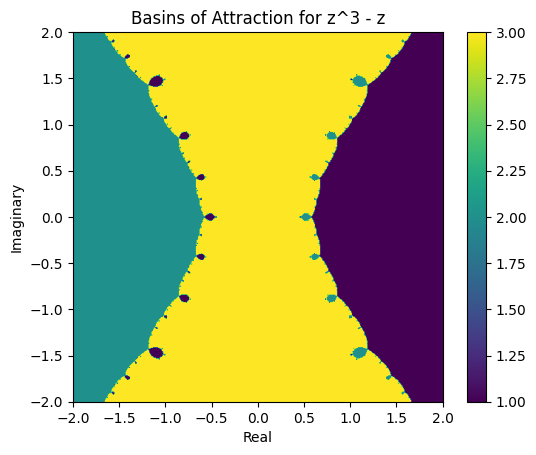

In [ ]:
# prompt: Show the basins of attraction for x**3-x in the complex plane

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(z):
  return z**3 - z

def df(z):
  return 3 * z**2 - 1

# Create a grid of complex numbers
real_range = (-2, 2)
imag_range = (-2, 2)
grid_size = 500
real_values = np.linspace(real_range[0], real_range[1], grid_size)
imag_values = np.linspace(imag_range[0], imag_range[1], grid_size)
z_grid = np.array([[complex(r, i) for r in real_values] for i in imag_values])

# Apply Newton-Raphson to each point in the grid
#roots = np.array([[newton(f, z, fprime=df) for z in row] for row in z_grid])
roots = newton(f, z_grid, fprime=df)

# Assign colors based on the root found
colors = np.zeros((grid_size, grid_size))
for i in range(grid_size):
  for j in range(grid_size):
    if roots[i, j] is None:
      colors[i, j] = 0
    elif abs(roots[i, j] - 1) < 0.5:
      colors[i, j] = 1
    elif abs(roots[i, j] - (-1)) < 0.5:
      colors[i, j] = 2
    elif abs(roots[i, j] - 0) < 0.5:
      colors[i, j] = 3
    else:
      colors[i, j] = 0  # Assign a default color


# Plot the basins of attraction
plt.imshow(colors, extent=[real_range[0], real_range[1], imag_range[0], imag_range[1]], origin='lower', cmap='viridis')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Basins of Attraction for z^3 - z')
plt.colorbar()
plt.show()


#### Example: $x^3-1$

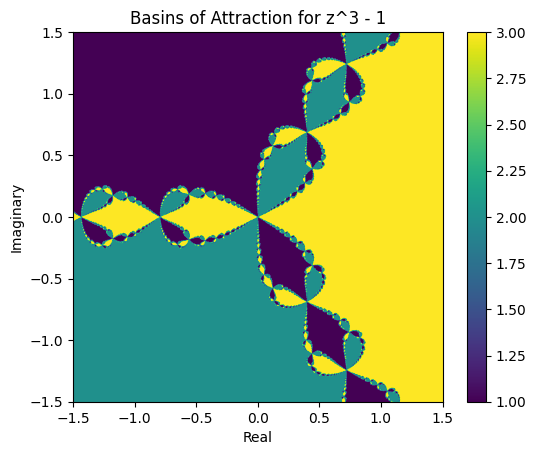

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(z):
  return z**3 - 1

def df(z):
  return 3 * z**2

# Create a grid of complex numbers
real_range = (-1.5, 1.5)
imag_range = (-1.5, 1.5)
grid_size = 1000
real_values = np.linspace(real_range[0], real_range[1], grid_size)
imag_values = np.linspace(imag_range[0], imag_range[1], grid_size)
z_grid = np.array([[complex(r, i) for r in real_values] for i in imag_values])

# Apply Newton-Raphson to each point in the grid
#roots = np.array([[newton(f, z, fprime=df) for z in row] for row in z_grid])
roots = newton(f, z_grid, fprime=df)

# Assign colors based on the root found
th = 1e-3
rs = np.roots([1,0,0,-1])
colors = np.zeros((grid_size, grid_size))
for i in range(grid_size):
  for j in range(grid_size):
    if roots[i, j] is None:
      colors[i, j] = 0
    elif abs(roots[i, j] - rs[0]) < th:
      colors[i, j] = 1
    elif abs(roots[i, j] - rs[1]) < th:
      colors[i, j] = 2
    elif abs(roots[i, j] - rs[2]) < th:
      colors[i, j] = 3
    else:
      colors[i, j] = 0  # Assign a default color


# Plot the basins of attraction
plt.imshow(colors, extent=[real_range[0], real_range[1], imag_range[0], imag_range[1]], origin='lower', cmap='viridis')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Basins of Attraction for z^3 - 1')
plt.colorbar()
plt.show()

Beautiful, but like most beautiful things... often problematic... It implies small changes in initial guesses can find dramatically different roots, and numerical methods are prone to 'small changes' due to roundoff error...